# Pratica 5 Redes Neurais

### Importação das Bibliotecas

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.colors
import time
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [10, 5] 

### Leitura da Base e Análise Exploratória

In [83]:
# Leitura dos dados fornecidos
dataFile = open("column_3C.dat", "r")
df = pd.read_csv(StringIO(dataFile.read()), sep="\s+", header=None)
df.columns = ['INCI_P','INCL_P','ALL','INCL_S','RP','GE','Target']

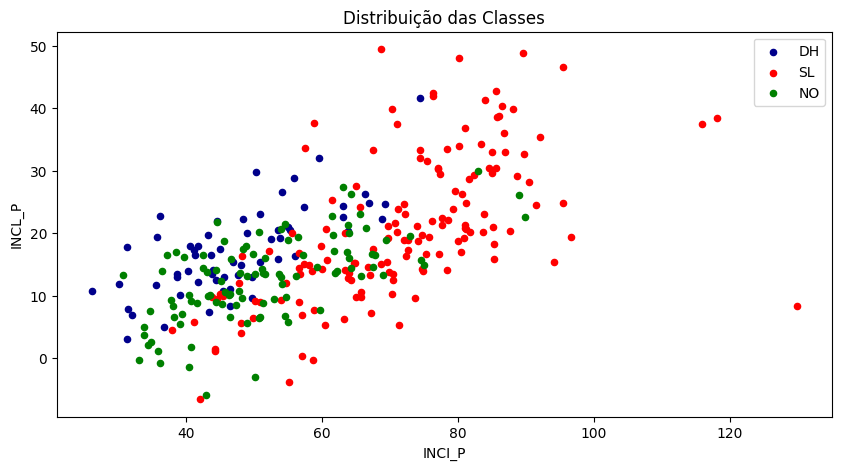

In [84]:
DH     = df[df['Target'] == 'DH']
SL     = df[df['Target'] == 'SL']
NO     = df[df['Target'] == 'NO'] 

plot_gp1 = DH.plot.scatter(x='INCI_P', y='INCL_P', color='DarkBlue', label='DH')
SL.plot.scatter(x='INCI_P', y='INCL_P', color='Red',  label='SL' ,ax=plot_gp1)
NO.plot.scatter(x='INCI_P', y='INCL_P', color='Green', label='NO',ax=plot_gp1)
plt.title('Distribuição das Classes')
plt.show()

### Divisão dos Dados

In [85]:
# Divisão entre entrada e saida, colocando os atributos em X e a classe alvo em y 
X = df.drop('Target',axis=1)
Y = df['Target']

In [86]:
# Mapeando a saida para um vetor
Y = Y.map({ 'DH':[0,0,1],
            'SL':[0,1,0],
            'NO':[1,0,0]
         })

In [87]:
# Divisão treino e teste em 70% para treino e 30% para teste
X_test, X_train,y_test,y_train = train_test_split(X, Y,test_size=0.7,random_state=1)

### Funções utilizadas para Criação do Percepton

In [88]:
def retornoPadrao(x):
    saida = np.zeros(len(x))
    saida[np.argmax(x, axis=0)] = 1
    return saida

def step_degrau(x):
    return np.array([np.heaviside(i, 0) for i in x])

def sigmoid(x):
    return np.array([1.0 / (1.0 + np.exp(-i)) for i in x])

def teste(w, b, X_teste, y_teste, function):
    arr_errors = []
    for i in range(0,len(X_teste)):
        result = function(w.dot(X_teste[i])+b)
        comp = y_teste[i]==retornoPadrao(result)
        arr_errors.append(comp.all())
    return arr_errors


def treino(max_it, alpha, X_treino, y_treino, function):
    # Pesos Sorteados
    w = np.random.randint(-1,1,(len(y_treino[0]),X_treino[0].size))
    b = np.random.randint(-1,1,(len(y_treino[0])))

    t = 1
    E = 1

    error_epoch = []
    while (t < max_it and E > 0):
        E = 0
        for i in range(0,len(X_treino)):
            y = function(w.dot(X_treino[i])+b)
            e = y_treino[i] - y

            w = w + (alpha*np.array([e]).transpose()*np.array([X_treino[i]]))
            b = b + (alpha*e)

            E = E + np.sum(np.square(e))
        error_epoch.append(E)
        t = t + 1
    return w,b, error_epoch


# Utilizando a função Sigmoid

In [89]:
w,b, error_epoch = treino(max_it=100, alpha = 0.1, X_treino=X_train.to_numpy(),y_treino=np.array(y_train),function=sigmoid)

/tmp/ipykernel_16446/4289041416.py:10: RuntimeWarning: overflow encountered in exp
  return np.array([1.0 / (1.0 + np.exp(-i)) for i in x])


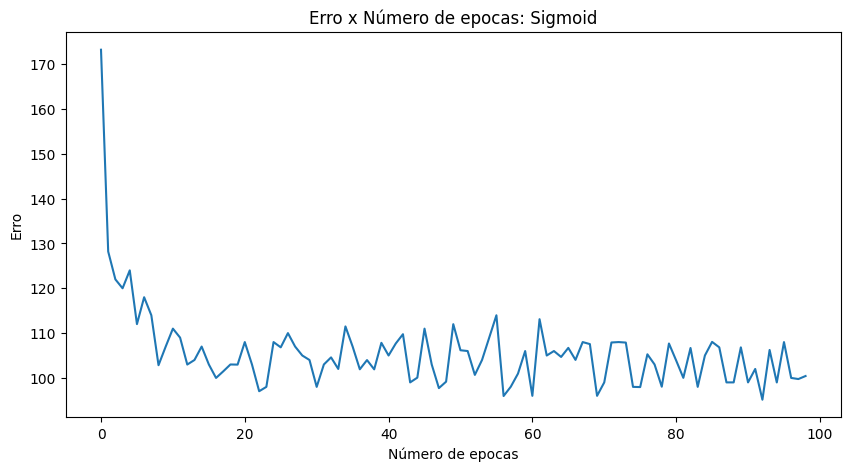

In [90]:
plt.figure(figsize=(10,5))
plt.plot(error_epoch)
plt.title('Erro x Número de epocas: Sigmoid')
plt.ylabel('Erro')
plt.xlabel('Número de epocas')
plt.show()

In [91]:
error    = teste(w, b, X_test.to_numpy(), np.array(y_test), sigmoid)
acuracia = np.sum(error)/len(error)
acuracia

/tmp/ipykernel_16446/4289041416.py:10: RuntimeWarning: overflow encountered in exp
  return np.array([1.0 / (1.0 + np.exp(-i)) for i in x])


0.8817204301075269

# Utilizando a função Degrau

In [92]:
w,b, error_epoch = treino(max_it=100, alpha = 0.1, X_treino=X_train.to_numpy(),y_treino=np.array(y_train),function=step_degrau)

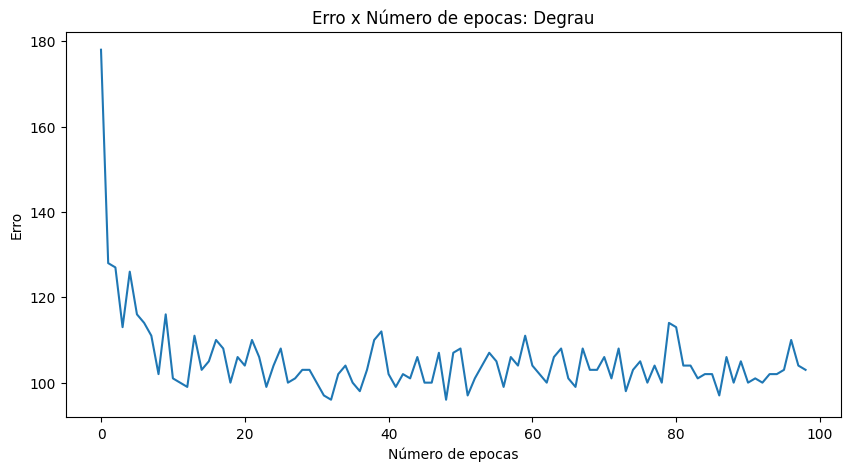

In [93]:
plt.figure(figsize=(10,5))
plt.plot(error_epoch)
plt.title('Erro x Número de epocas: Degrau')
plt.ylabel('Erro')
plt.xlabel('Número de epocas')
plt.show()

In [94]:
error    = teste(w, b, X_test.to_numpy(), np.array(y_test), step_degrau)
acuracia = np.sum(error)/len(error)
acuracia

0.7741935483870968